# Finance Project

- **Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

- **Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
<br>
- Handle Outliners<br> 
- Convert Categorical into Numerical<br>
- Data fit<br>
- Model building <br>
- Logistic, SVM<br>

In [8]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy.stats import zscore 
from sklearn.preprocessing import PowerTransformer
import plotly.express as ps 

In [3]:
df= pd.read_csv('Bank_Personal_Loan_Modelling.csv')
#df.head()
#df.shape

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.drop(['ZIP Code','ID'], axis=1, inplace=True)
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [9]:
#5 number summary 
fig = ps.box(df ,y = ['Age','Experience','Income','Family','Education'])
fig.show()

For age 
    above 55 very less peple take loan 
    below 23 will not take loan 
    experience above 30 will not take loan 
    min experience is -3 !!!!!! THIS IS ERROR 
    income - some are outlyers 

In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

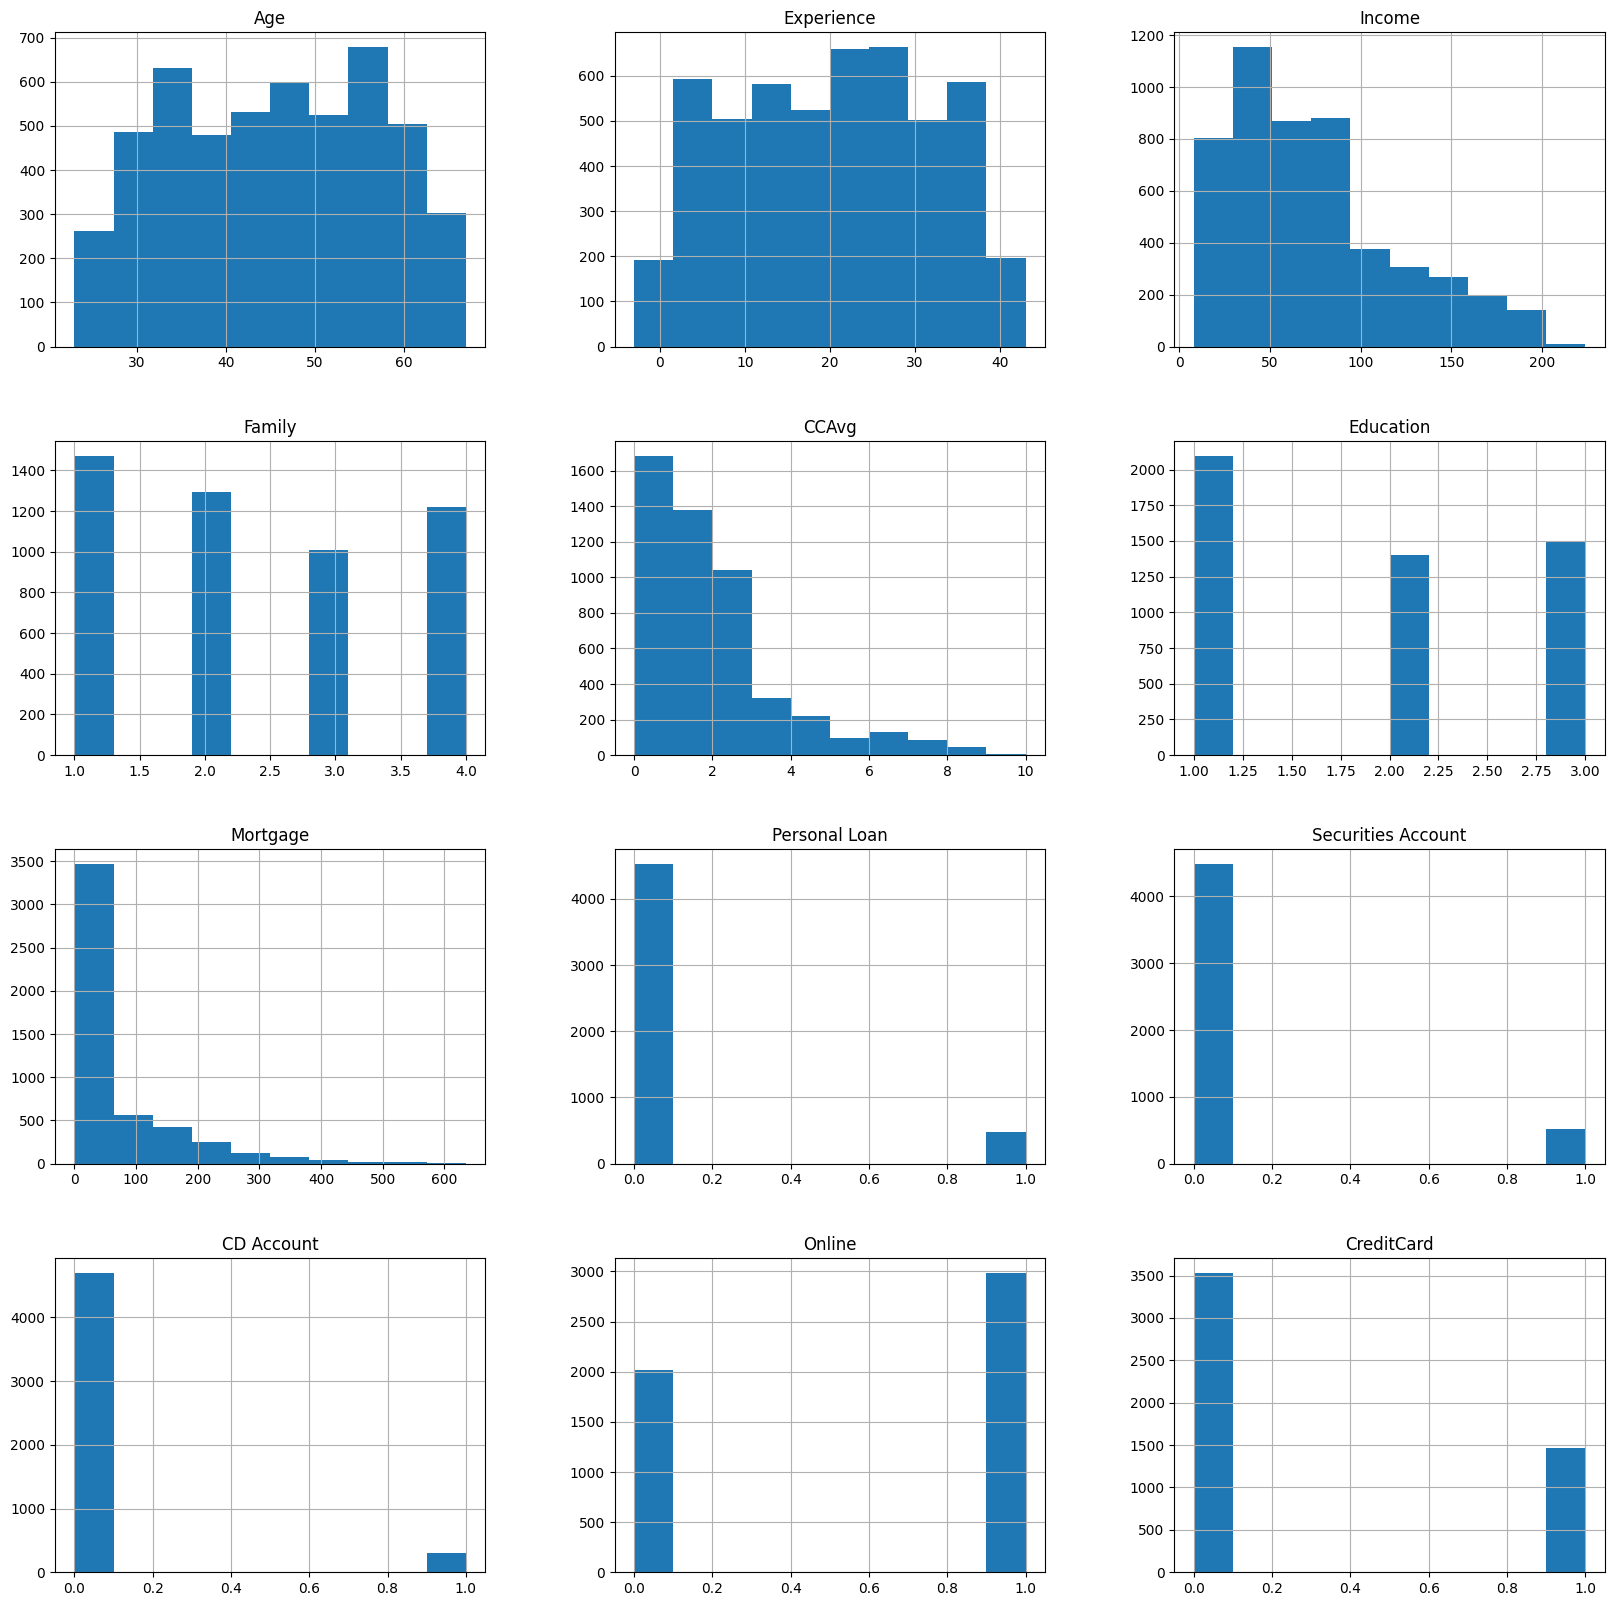

In [12]:
df.hist(figsize=(20,20))

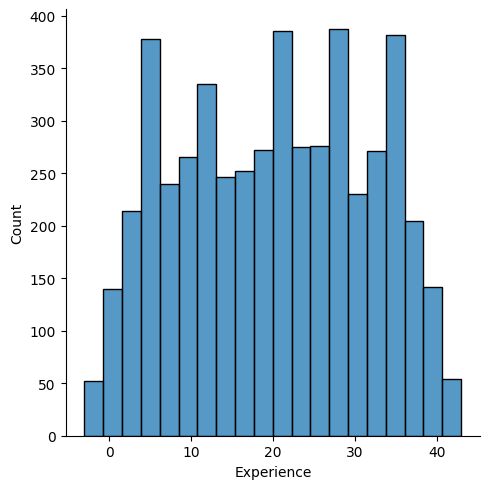

In [13]:
sns.displot(df['Experience'])

In [14]:
df['Experience'].mean()

20.1046

In [15]:
negative_data =df[df['Experience']<0]
negative_data.head

<bound method NDFrame.head of       Age  Experience  Income  Family  CCAvg  Education  Mortgage   
89     25          -1     113       4   2.30          3         0  \
226    24          -1      39       2   1.70          2         0   
315    24          -2      51       3   0.30          3         0   
451    28          -2      48       2   1.75          3        89   
524    24          -1      75       4   0.20          1         0   
536    25          -1      43       3   2.40          2       176   
540    25          -1     109       4   2.30          3       314   
576    25          -1      48       3   0.30          3         0   
583    24          -1      38       2   1.70          2         0   
597    24          -2     125       2   7.20          1         0   
649    25          -1      82       4   2.10          3         0   
670    23          -1      61       4   2.60          1       239   
686    24          -1      38       4   0.60          2         0   
793 

In [16]:
negative_data.shape

(52, 12)

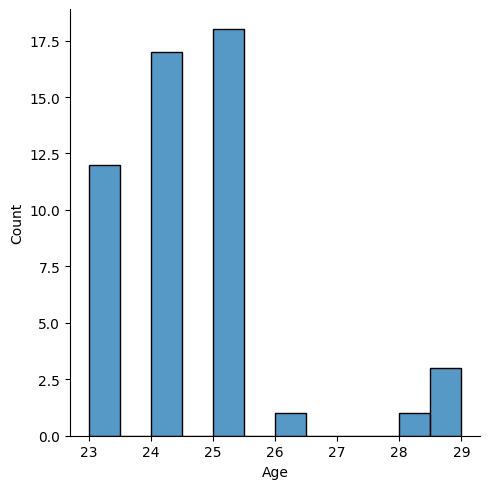

In [17]:
sns.displot(negative_data['Age'])

In [18]:
negative_data['Experience'].mean()

-1.4423076923076923

In [19]:
negative_data.size

624

In [20]:
print('There are {}  records which has negative values for experience, approx {} % '.format(negative_data.size, (negative_data.size/df.size)*100))

There are 624  records which has negative values for experience, approx 1.04 % 


Now we will copy data so that original data is safe 

In [21]:
data= df.copy()

we find negative data 
find the mean of data 
fill those values with the mean values 

In [22]:
data['Experience']= np.where(data['Experience']<0, #-ve data 
                             data['Experience'].mean(), #mean of data 
                             data['Experience'] ) # fill mean in place of -ve data

In [23]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


as we can see there is no neagtive values left 

In [24]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

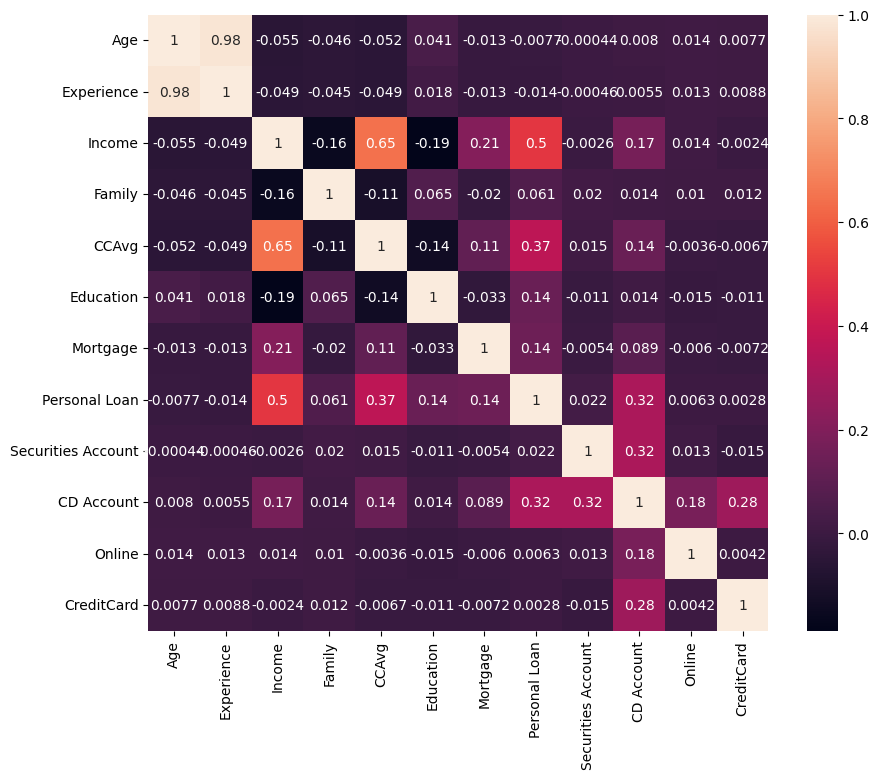

In [25]:
plt.figure(figsize=(10,8))  
sns.heatmap(data.corr(), annot=True)

we can see age and experience has most corr hence one must be removed <br>
age is better optio to be kept(based on data)

In [26]:
data = data.drop(['Experience'], axis=1)

In [27]:
data.columns
#removed 

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [28]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [29]:
def experience(x) :
    if x==1:
        return "Undergrad"
    if x==2:
        return "Graduate"
    if x==3 :
        return "Professional Person"  

In [30]:
data['EDU']= data['Education'].apply(experience)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0,Professional Person
4996,30,15,4,0.4,1,85,0,0,0,1,0,Undergrad
4997,63,24,2,0.3,3,0,0,0,0,0,0,Professional Person
4998,65,49,3,0.5,2,0,0,0,0,1,0,Graduate


In [33]:
data['EDU'].unique()

array(['Undergrad', 'Graduate', 'Professional Person'], dtype=object)

In [34]:
education_dis= data.groupby('EDU')['Age'].count()
education_dis


EDU
Graduate               1403
Professional Person    1501
Undergrad              2096
Name: Age, dtype: int64

In [35]:
fig_1= ps.pie(data, values=education_dis, names=education_dis.index, title= 'pie chart education')
fig_1.show()

In [36]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [37]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [38]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [39]:
def security(y):
    if (y['Securities Account'] == 1) and (y['CD Account'] == 1):
        return "Holds seurities and Deposite"
    if (y['Securities Account'] == 0) and (y['CD Account'] == 0):
        return "Not Holds both seurities and Deposite"
    if (y['Securities Account'] == 1) and (y['CD Account'] == 0):
        return "Holds only seurities "
    if (y['Securities Account'] == 0) and (y['CD Account'] == 1):
        return "Holds only Deposite"
    

In [40]:
data['Account Holder category'] = data.apply(security, axis=1)

In [41]:
#data.head()

In [42]:
data['Account Holder category'].nunique()

4

In [43]:
account_category  = data['Account Holder category'].value_counts()

In [44]:
account_category.values

array([4323,  375,  155,  147], dtype=int64)

In [45]:
account_category.keys

<bound method Series.keys of Account Holder category
Not Holds both seurities and Deposite    4323
Holds only seurities                      375
Holds only Deposite                       155
Holds seurities and Deposite              147
Name: count, dtype: int64>

In [46]:
account_category.index

Index(['Not Holds both seurities and Deposite', 'Holds only seurities ',
       'Holds only Deposite', 'Holds seurities and Deposite'],
      dtype='object', name='Account Holder category')

In [47]:
fig = ps.pie(values = account_category.values, names= account_category.index, title="Pie chart account_category")
fig.show()

In [48]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account Holder category'],
      dtype='object')

In [49]:
ps.box(data , x='Education' , y='Income' , facet_col='Personal Loan')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\4088253202.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\4088253202.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




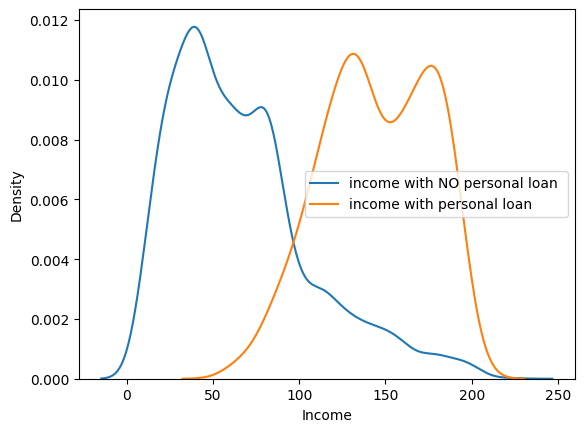

In [50]:
sns.distplot(data[data['Personal Loan']==0]['Income'], hist=False, label='income with NO personal loan ')
sns.distplot(data[data['Personal Loan']==1]['Income'], hist=False, label='income with personal loan ')
plt.legend()

In [51]:
def plot(col1, col2, lb1, lb2, title):
    sns.distplot(data[data[col1]==0][col2], hist=False, label=lb1)
    sns.distplot(data[data[col1]==1][col2], hist=False, label=lb2)
    plt.legend()
    plt.title(title)    

C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\993703037.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\993703037.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




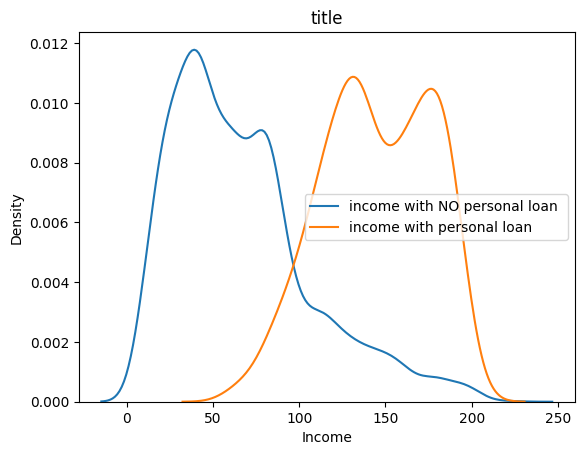

In [52]:
plot('Personal Loan', 'Income','income with NO personal loan ','income with personal loan ', "title" )

C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\993703037.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\993703037.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




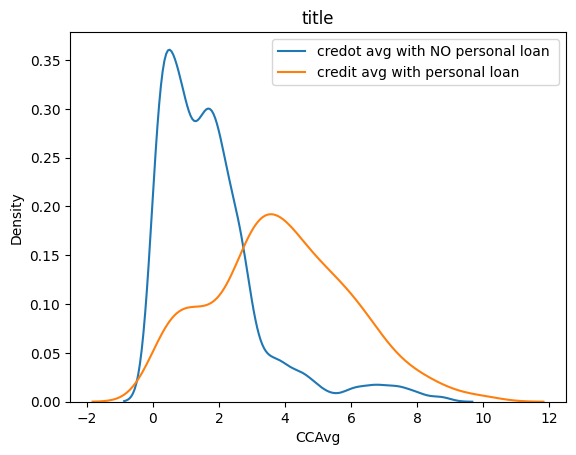

In [53]:
plot('Personal Loan','CCAvg' ,'credot avg with NO personal loan ','credit avg with personal loan ', "title" )

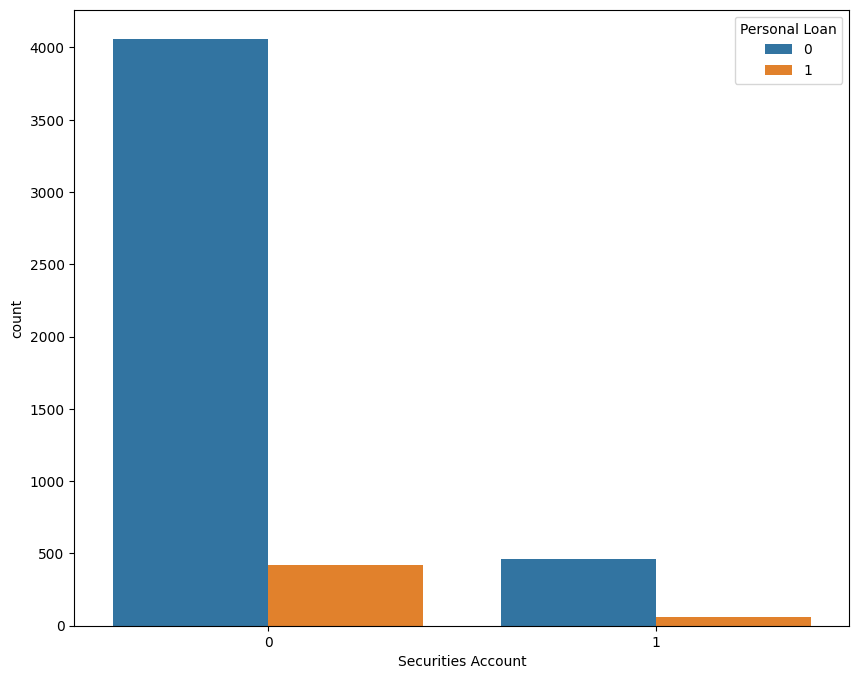

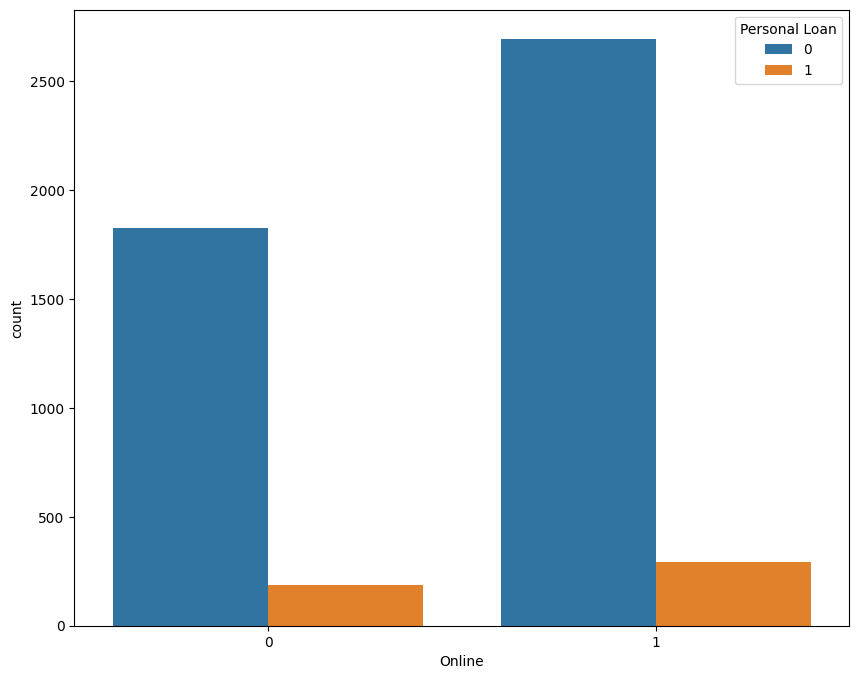

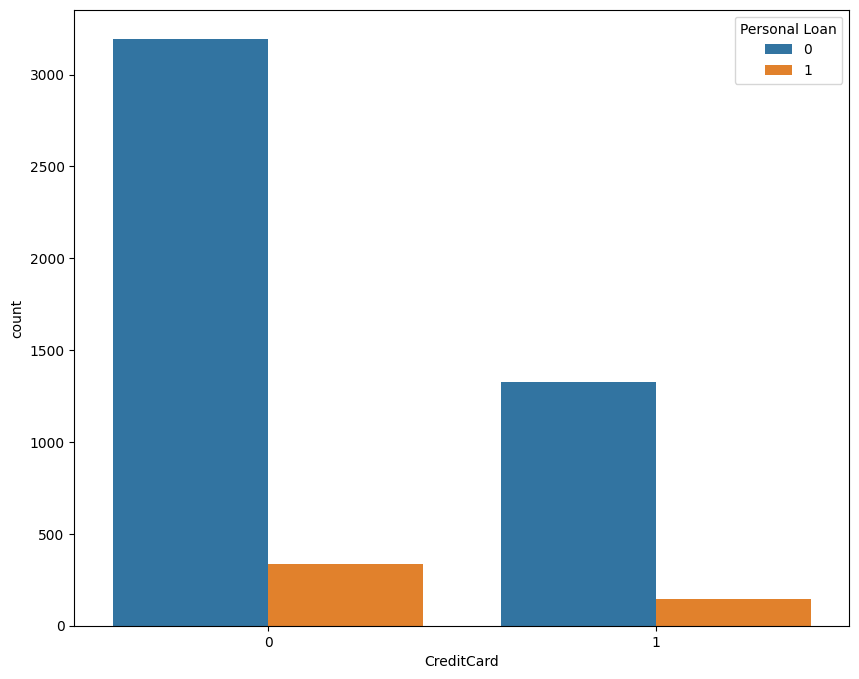

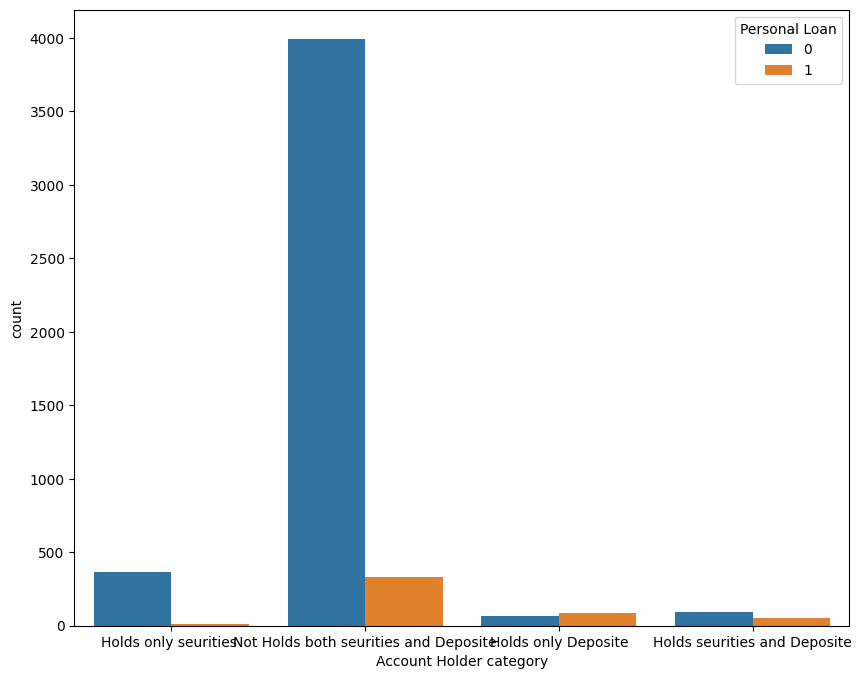

In [54]:
col= [ 'Securities Account','Online','CreditCard','Account Holder category']
for i in col:
    plt.figure(figsize= (10, 8))
    sns.countplot(x=i , data= data , hue='Personal Loan')

To handle skweness we have several methods<br> Below are a few:

In [55]:
#IQR method
def IQR(col):
    data[col] = pd.to_numeric(data[col])
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return IQR

In [56]:
print(IQR('Age'))
print(IQR('Income'))
print(IQR('Family'))
print(IQR('CCAvg'))
print(IQR('Education'))
print(IQR('Mortgage'))
print(IQR('Personal Loan'))
print(IQR('Securities Account'))
print(IQR('CD Account'))
print(IQR('Online'))
print(IQR('CreditCard'))


20.0
59.0
2.0
1.8
2.0
101.0
0.0
0.0
0.0
1.0
1.0


In [57]:
# log normal transformation
data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1 )
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


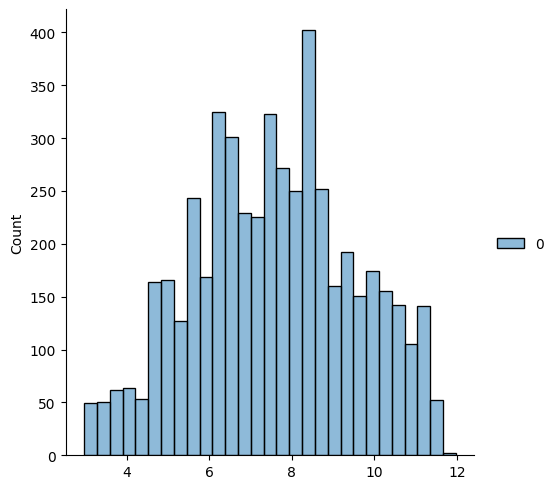

In [58]:
#Power transformer 
pt= PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.displot(Income)
plt.show()
